## EDA: Trends in Homelessness since Housing First Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

### Read Project Data

In [2]:
url = "../20_intermediate_files/project_data_rates.csv"
data = pd.read_csv(url, index_col=0)
data.head()


,CoC Number,Coc,Year,permanent_housing,homeless,poverty,unemployment_rate,Population,Male,Female,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Two or More Races,Non Hispanic,Hispanic,Drug Deaths,Suicide Deaths
0,AZ-502,"Phoenix,Mesa/Maricopa",2007,52.001543,218.127624,98946.775104,3200.0,3872962,50412.475000,49587.525000,87858.904890,4886.079440,2248.950545,3007.620524,231.967161,1766.477440,69301.067245,30698.932755,14.846518,14.665778
1,AZ-502,"Phoenix,Mesa/Maricopa",2008,63.740080,181.620069,98615.857511,5100.0,3958263,50450.159578,49549.840422,87561.084243,5048.527599,2244.696727,3094.817095,236.568414,1814.305922,68666.685362,31333.314638,13.288657,13.642348
2,AZ-502,"Phoenix,Mesa/Maricopa",2009,62.861472,196.091006,98737.277325,8900.0,4023132,50471.871169,49528.128831,87320.152558,5202.364725,2218.719147,3163.182317,240.484279,1855.096974,68167.934833,31832.065167,14.068641,13.024678
3,AZ-502,"Phoenix,Mesa/Maricopa",2010,78.933918,183.358278,98824.767488,9500.0,3817117,49473.594862,50526.405138,85623.940791,5389.722138,2610.949573,3675.155883,264.990567,2435.241047,70429.489062,29570.510938,15.954449,14.775549
4,AZ-502,"Phoenix,Mesa/Maricopa",2011,82.933995,150.463014,98699.221313,8500.0,3875371,49431.628611,50568.371389,85242.470979,5479.423776,2627.387159,3847.347777,266.142261,2537.228049,70307.797628,29692.202372,16.179096,16.024272


In [3]:
data.columns

Index(['CoC Number', 'Coc', 'Year', 'permanent_housing', 'homeless', 'poverty',
       'unemployment_rate', 'Population', 'Male', 'Female', 'White',
       'Black or African American', 'American Indian and Alaska Native',
       'Asian', 'Native Hawaiian and Other Pacific Islander',
       'Two or More Races', 'Non Hispanic', 'Hispanic', 'Drug Deaths',
       'Suicide Deaths'],
      dtype='object')

### 1. Percentage Change in Homelessness between 2007 and 2021

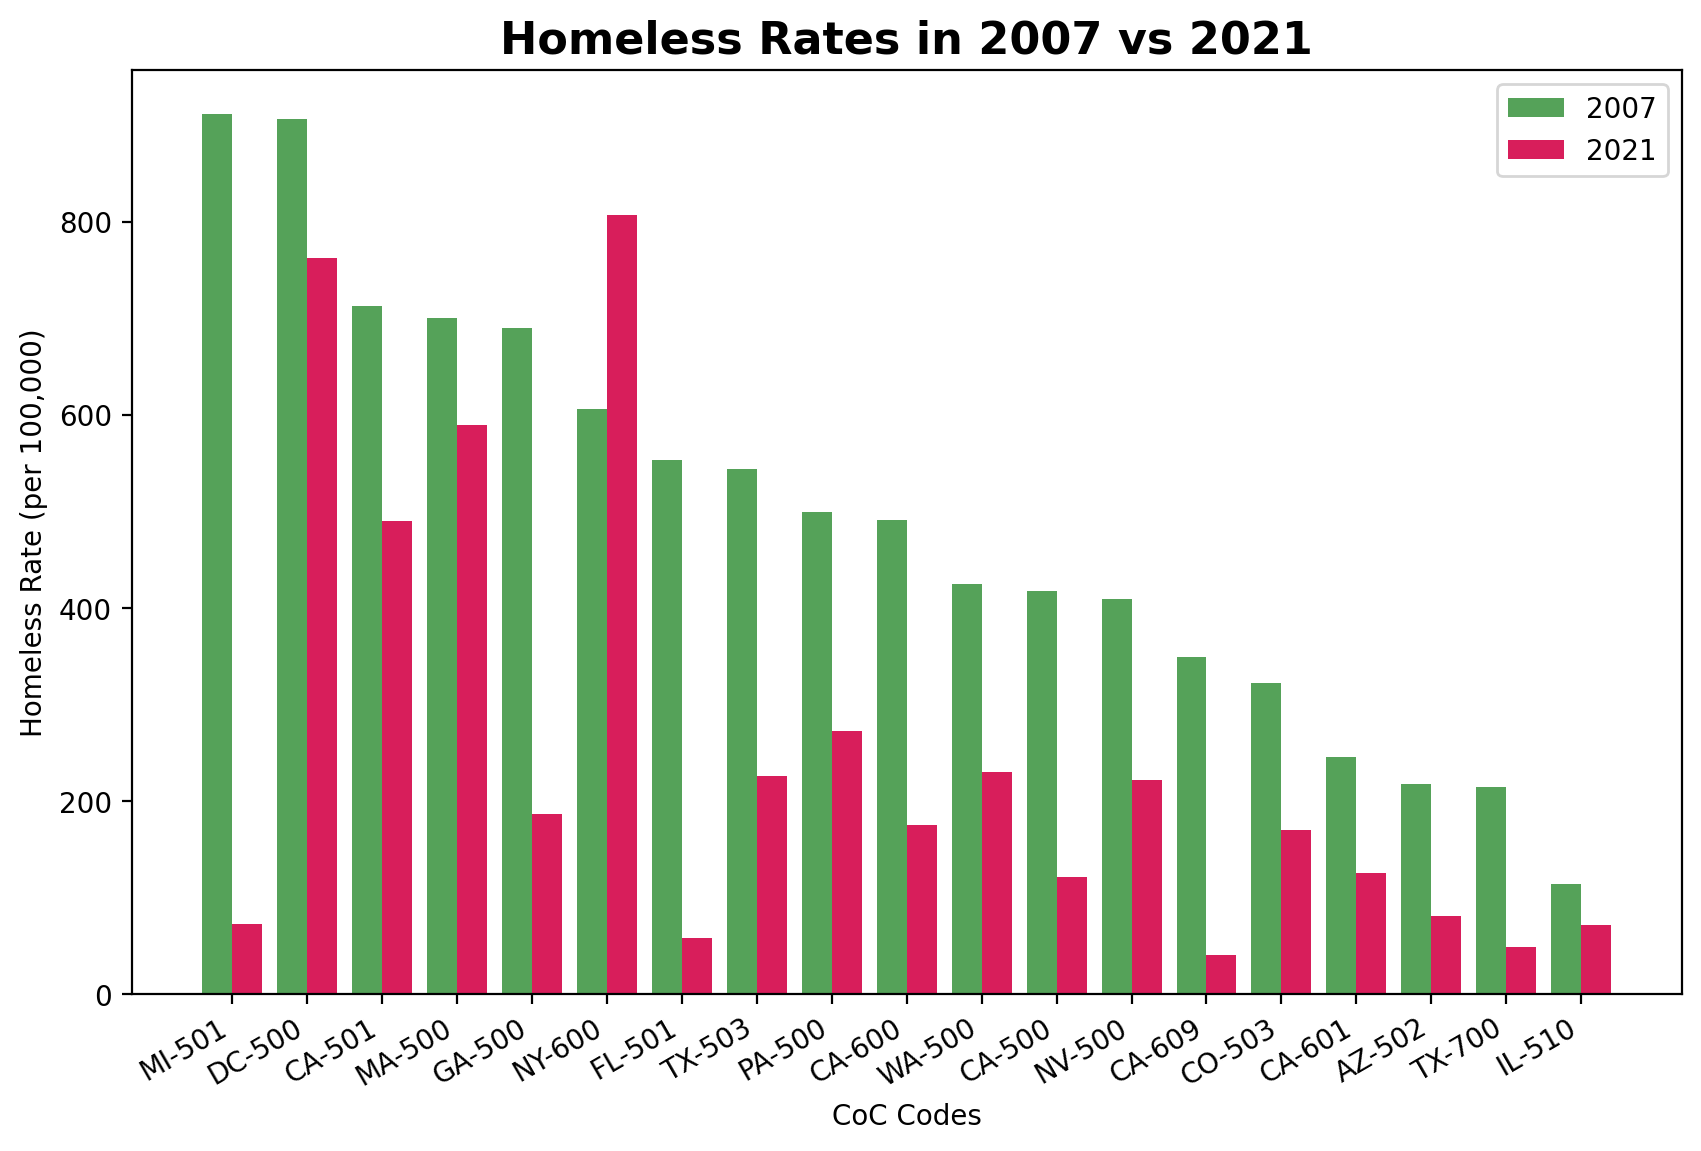

In [4]:
Cocs = data["CoC Number"].unique().tolist()
homeless_07 = []
homeless_21 = []

for i in Cocs:
    tmp_07 = data[(data["CoC Number"] == i) & (data["Year"] == 2007)][
        "homeless"
    ].to_list()
    tmp_21 = data[(data["CoC Number"] == i) & (data["Year"] == 2021)][
        "homeless"
    ].to_list()
    homeless_07.append(tmp_07[0])
    homeless_21.append(tmp_21[0])

# make a dict
homeless_07_21 = {}

for i in range(len(Cocs)):
    tmp_pair = [homeless_07[i], homeless_21[i]]
    homeless_07_21[Cocs[i]] = tmp_pair
# sort the data
sorted_07_21 = sorted(homeless_07_21.items(), key=lambda x: x[1][0], reverse=True)
Cocs_numbers, homeless_data = zip(*sorted_07_21)

# plot the bars for 2007 and 2021
fig, ax = plt.subplots(figsize=(10, 6))
ind = range(len(Cocs_numbers))
width = 0.4
ax.bar(ind, [v[0] for v in homeless_data], width, label="2007", color="#55A259")
ax.bar(
    [i + width for i in ind],
    [v[1] for v in homeless_data],
    width,
    label="2021",
    color="#D81E5B",
)
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(Cocs_numbers)
ax.set_xlabel("CoC Codes")
ax.set_ylabel("Homeless Rate (per 100,000)")
ax.set_title("Homeless Rates in 2007 vs 2021", fontsize=16, fontweight='bold')
ax.legend()

plt.xticks(rotation=30, ha="right")
plt.savefig("../30_results/1_homeless0721.jpg", dpi=1200)
plt.show()


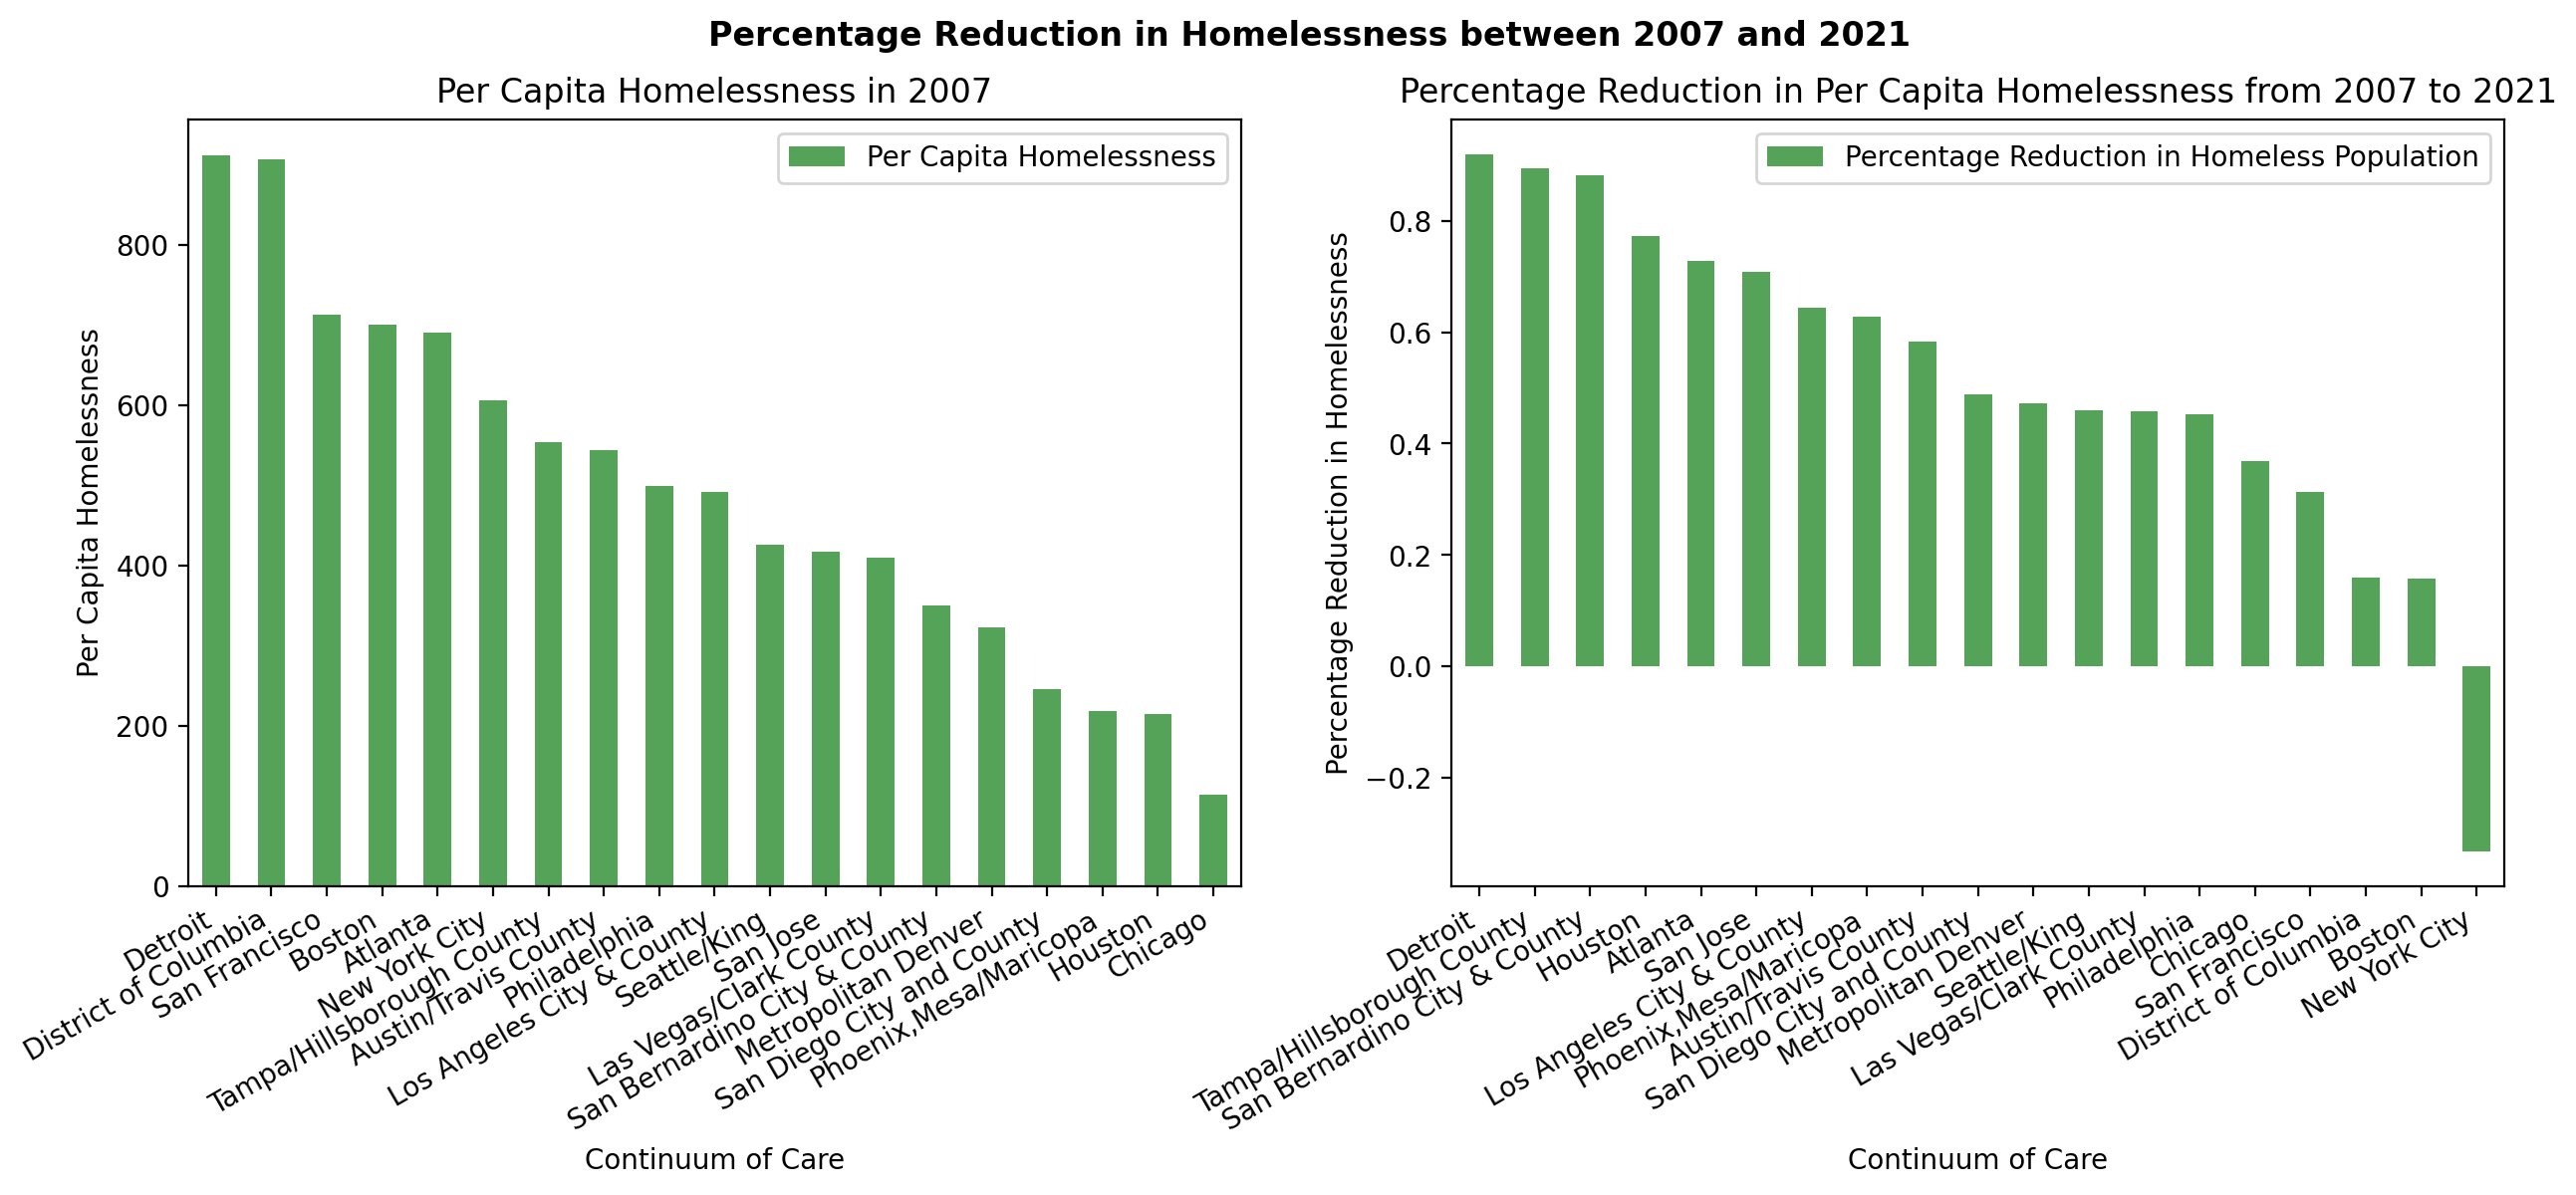

In [5]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Per Capita Homelessness in 2007
data.loc[data.loc[:, "Year"] == 2007, :].sort_values(
    "homeless", ascending=False
).rename(
    columns={
        "homeless": "Per Capita Homelessness",
        "Coc": "Continuum of Care",
    }
).replace(
    {
        "Houston, Pasadena, Conroe/Harris, Ft. Bend, Montgomery": "Houston",
        "San Jose/Santa Clara City & County": "San Jose",
    }
).plot(
    x="Continuum of Care",
    y="Per Capita Homelessness",
    kind="bar",
    ax=ax1,
    color="#55A259",
    title="Per Capita Homelessness in 2007",
    ylabel="Per Capita Homelessness",
)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right", size=10)

# Plotting Percent Change in Homelessness
pct_chg_data = (
    (
        data.loc[
            (data.loc[:, "Year"] == 2007) | (data.loc[:, "Year"] == 2021),
            ["Coc", "Year", "homeless"],
        ]
        .sort_values(by=["Coc", "Year"])
        .groupby("Coc")
        .pct_change()
        .dropna()
        * -1
    )
    .merge(data, how="left", left_index=True, right_index=True)
    .sort_values("homeless_x", ascending=False)
    .rename(
        columns={
            "homeless_x": "Percentage Reduction in Homeless Population",
            "Coc": "Continuum of Care",
        }
    )
    .replace(
        {
            "Houston, Pasadena, Conroe/Harris, Ft. Bend, Montgomery": "Houston",
            "San Jose/Santa Clara City & County": "San Jose",
        }
    )
)

pct_chg_data.plot(
    x="Continuum of Care",
    y="Percentage Reduction in Homeless Population",
    kind="bar",
    ax=ax2,
    title="Percentage Reduction in Per Capita Homelessness from 2007 to 2021",
    ylabel="Percentage Reduction in Homelessness",
    color="#55A259",
)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right", size=10)

# add a main title for the figure
fig.suptitle("Percentage Reduction in Homelessness between 2007 and 2021", fontweight = 'bold')

# Export to results
plt.savefig("../30_results/2_Percentage_Change_in_Homelessness_between_2007_and_2021.jpg", dpi=1200, bbox_inches = 'tight')

# display the plot
plt.show()


### 2. Comparison of Success Against January Temperatures

In [6]:
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature")[3]

In [7]:
table

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.
0,Antigua and Barbuda,St. John's,25.4 (77.7),25.2 (77.4),25.6 (78.1),26.3 (79.3),27.2 (81.0),27.9 (82.2),28.2 (82.8),28.3 (82.9),28.1 (82.6),27.5 (81.5),26.8 (80.2),25.9 (78.6),26.9 (80.4),[258]
1,Aruba,Oranjestad,26.7 (80.1),26.8 (80.2),27.2 (81.0),27.9 (82.2),28.5 (83.3),28.7 (83.7),28.6 (83.5),29.1 (84.4),29.2 (84.6),28.7 (83.7),28.1 (82.6),27.2 (81.0),28.1 (82.6),[259]
2,The Bahamas,Nassau,21.1 (70.0),21.1 (70.0),22.2 (72.0),23.4 (74.1),25.3 (77.5),26.9 (80.4),27.9 (82.2),27.9 (82.2),27.3 (81.1),25.9 (78.6),23.8 (74.8),21.9 (71.4),24.6 (76.3),[260]
3,Barbados,Bridgetown,25.8 (78.4),25.7 (78.3),26.2 (79.2),26.8 (80.2),27.6 (81.7),27.7 (81.9),27.6 (81.7),27.8 (82.0),27.7 (81.9),27.5 (81.5),27.0 (80.6),26.4 (79.5),27.0 (80.6),[261]
4,Belize,Belize City,24.0 (75.2),24.9 (76.8),25.9 (78.6),27.3 (81.1),28.3 (82.9),28.5 (83.3),28.1 (82.6),28.2 (82.8),28.0 (82.4),27.0 (80.6),25.6 (78.1),24.5 (76.1),26.7 (80.1),[262]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,United States,Tampa,15.9 (60.6),17.3 (63.2),19.5 (67.1),22.1 (71.7),25.7 (78.2),27.8 (82.0),28.2 (82.8),28.3 (83.0),27.5 (81.5),24.4 (76.0),20.6 (69.0),17.2 (63.0),22.9 (73.2),[350]
94,United States,Tucson,11.6 (52.9),13.1 (55.6),15.8 (60.5),19.7 (67.4),24.6 (76.3),29.6 (85.2),30.8 (87.4),29.8 (85.7),27.7 (81.9),21.9 (71.4),15.6 (60.1),11.3 (52.3),20.9 (69.7),[351]
95,United States,Virginia Beach,4.9 (40.8),6.1 (43.0),9.8 (49.7),14.8 (58.6),19.4 (67.0),24.3 (75.7),26.7 (80.0),25.7 (78.3),22.6 (72.6),16.9 (62.4),11.8 (53.2),6.9 (44.5),15.8 (60.5),[352]
96,United States,"Washington, D.C.",2.3 (36.1),3.9 (39.1),8.3 (46.9),13.8 (56.9),18.9 (66.1),24.1 (75.3),26.6 (79.8),25.7 (78.2),21.7 (71.1),15.3 (59.6),9.8 (49.6),4.3 (39.8),14.6 (58.2),[309]


In [8]:
table = table.loc[table.loc[:, "Country"] == 'United States', ['Country', 'City', 'Jan']]

In [9]:
pct_chg_data.loc[:, "Continuum of Care"] = pct_chg_data.loc[:, "Continuum of Care"].apply(lambda x: x.split(",")[0]).apply(
    lambda x: x.split("/")[0]
).apply(lambda x: x.split(" City & County")[0]).apply(
    lambda x: x.split(" City and County")[0]
).replace(
    {"Metropolitan Denver": "Denver", "District of Columbia": "Washington, D.C."}
)

In [10]:
pct_chg_v_temp = pct_chg_data.loc[
    :, ["Continuum of Care", "Percentage Reduction in Homeless Population"]
].merge(table, how="left", left_on="Continuum of Care", right_on="City").dropna().loc[
    :, ["City", "Percentage Reduction in Homeless Population", "Jan"]
]

pct_chg_v_temp.loc[:, 'Jan'] = pct_chg_v_temp.loc[:, 'Jan'].apply(lambda x: x.split("(")[1].split(")")[0]).astype(float)

/var/folders/5t/21b877rx3j351j7w3qg967340000gn/T/ipykernel_4587/4280913314.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pct_chg_v_temp.loc[:, 'Jan'] = pct_chg_v_temp.loc[:, 'Jan'].apply(lambda x: x.split("(")[1].split(")")[0]).astype(float)


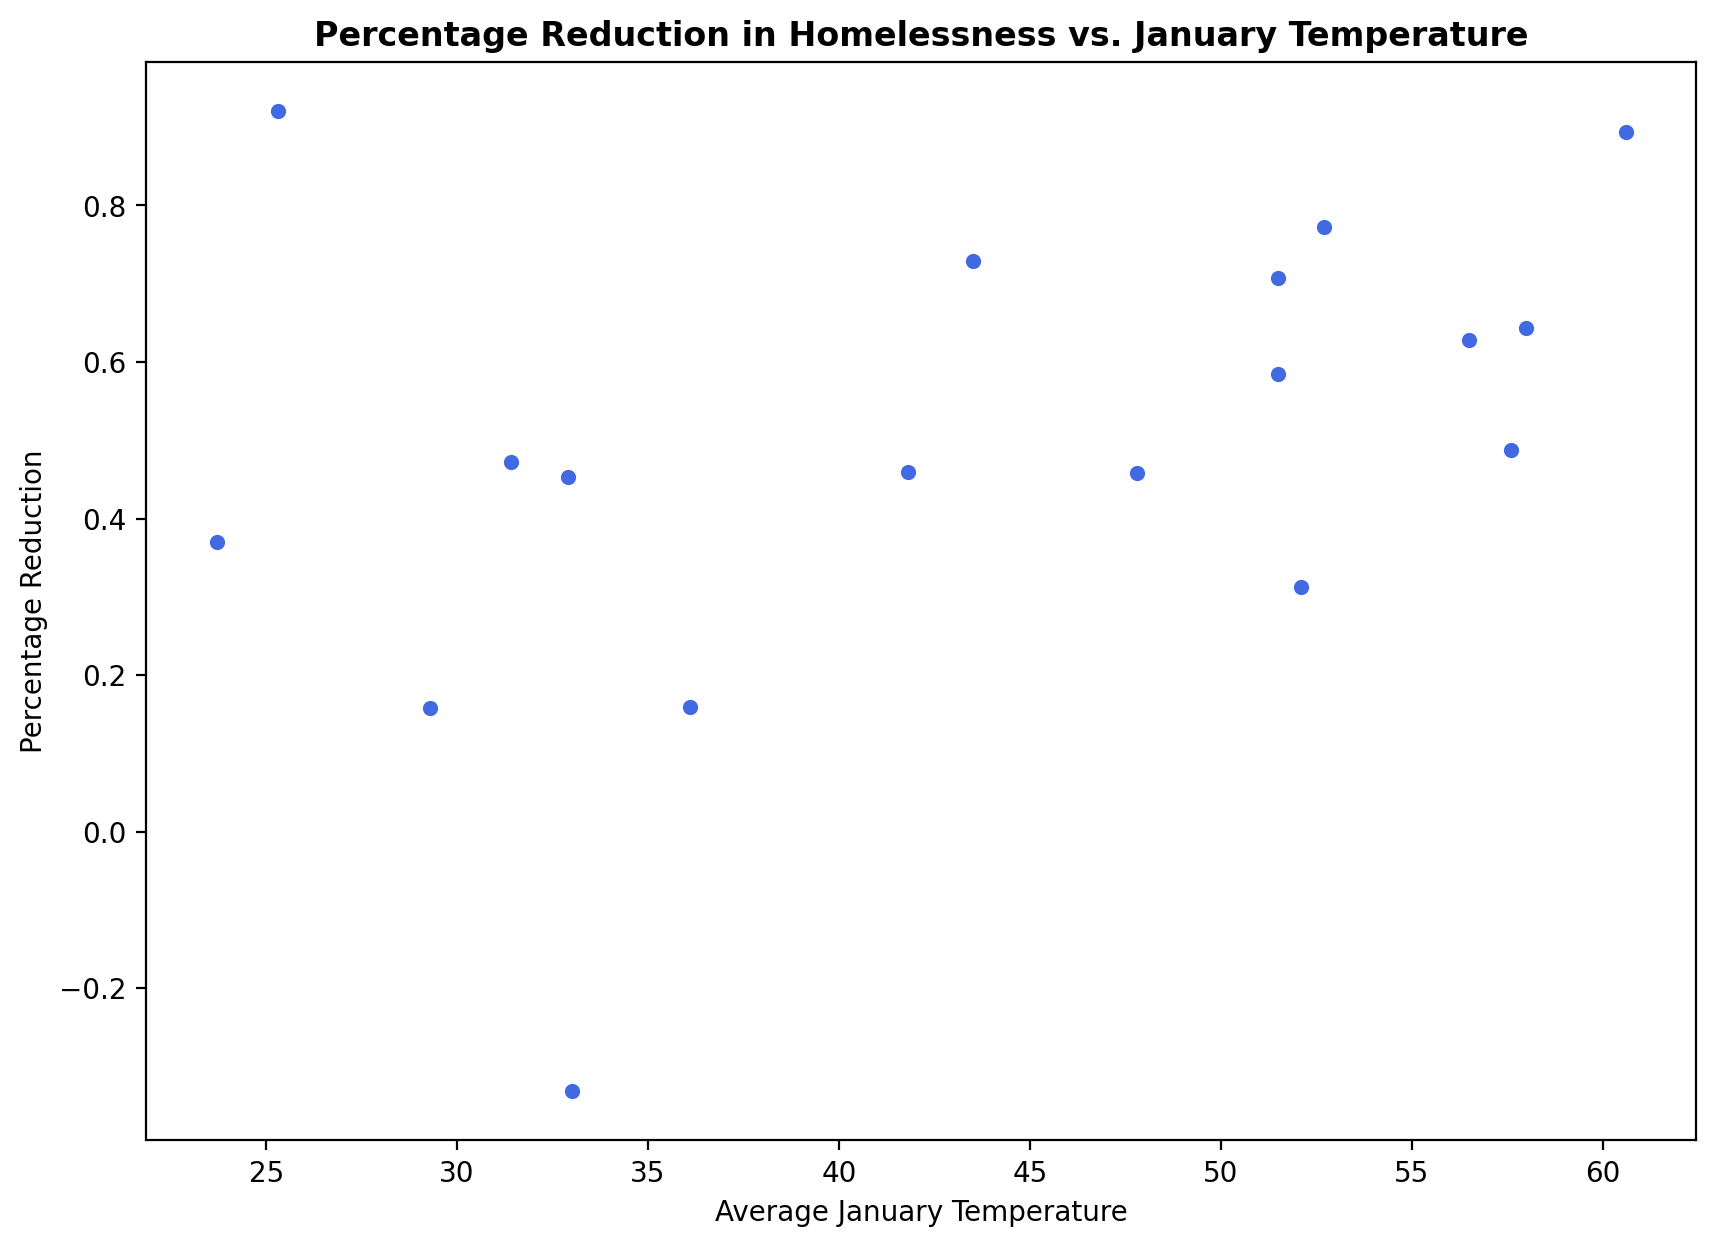

In [11]:
pct_chg_v_temp.rename(columns = {'Jan': 'Average January Temperature'}).plot(
    x="Average January Temperature",
    y="Percentage Reduction in Homeless Population",
    kind="scatter",
    figsize=(10, 7),
    # title="Percentage Reduction in Homelessness vs. January Temperature",
    ylabel="Percentage Reduction",
    color="royalblue",
)
plt.title("Percentage Reduction in Homelessness vs. January Temperature", fontweight = 'bold')

# Export to results
plt.savefig("../30_results/3_Percentage_Reduction_in_Homelessness_vs_Jan_Temp.jpg", dpi=1200, bbox_inches = 'tight')

plt.show()

### 3. Permanent Housing provided by CoCs following Housing First Implementation

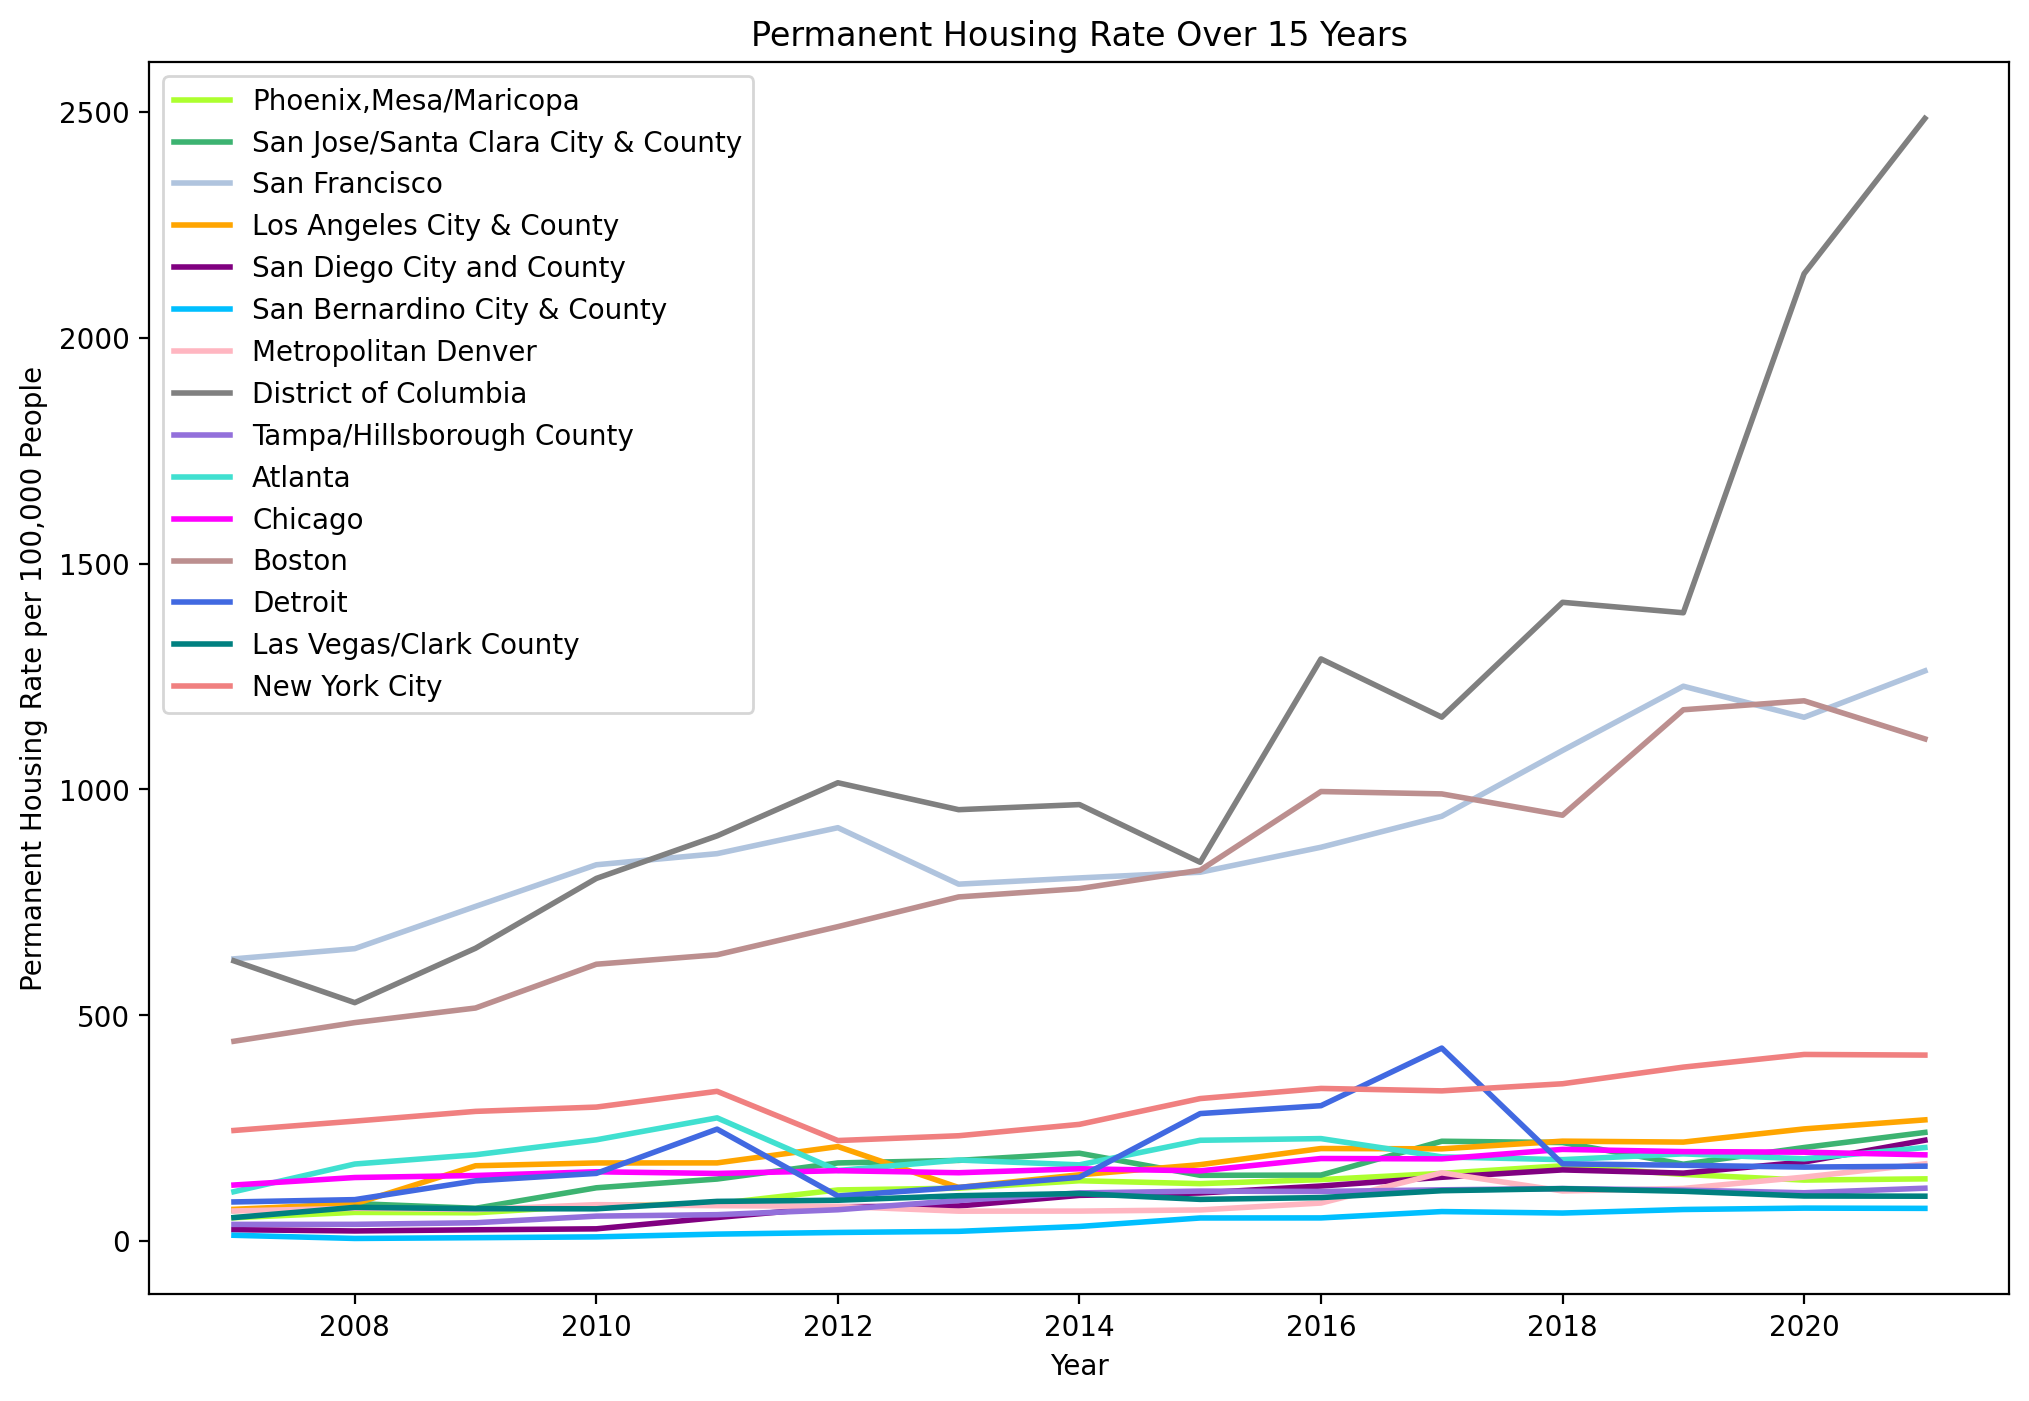

In [3]:
colors = [
    "greenyellow",
    "mediumseagreen",
    "lightsteelblue",
    "orange",
    "purple",
    "deepskyblue",
    "lightpink",
    "gray",
    "mediumpurple",
    "turquoise",
    "magenta",
    "rosybrown",
    "royalblue",
    "teal",
    "lightcoral",
]

plt.figure(figsize=(12, 8))
for i in range(15):
    plt.plot(
        data["Year"].unique(),
        data[data["CoC Number"] == data["CoC Number"].unique()[i]][
            "permanent_housing"
        ],
        label=data["Coc"].unique()[i],
        linewidth=2,
        color=colors[i],
    )
plt.legend()
plt.ylabel("Permanent Housing Rate per 100,000 People")
plt.xlabel("Year")
plt.title("Permanent Housing Rate Over 15 Years")
plt.savefig("../30_results/4_Permanent_Housing_Rate_Over_15_Years_allCoCs.jpg", dpi=1200, bbox_inches = 'tight')
plt.show()

In [4]:
#get homelessness rates reduction for each Coc from 2007 to 2021

def get_rate_reduction(factor, start_year, end_year):
    changes_dict = {}
    tmp_data = data[["Year", "CoC Number", factor]]
    for coc in tmp_data["CoC Number"].unique().tolist():
        tmp_start=  tmp_data[(tmp_data["CoC Number"] == coc)& (tmp_data["Year"] == start_year) ][factor].values
        tmp_end= tmp_data[(tmp_data["CoC Number"] == coc)& (tmp_data["Year"] == end_year) ][factor].values
        change = ((tmp_start - tmp_end)/ tmp_start)*100
        changes_dict[coc] = change[0]
    return changes_dict

get_homeless_rate = get_rate_reduction("homeless", 2007, 2021)
get_homeless_rate

above_50 = {k: v for k, v in get_homeless_rate.items() if v > 50}
below_50 = {k: v for k, v in get_homeless_rate.items() if v < 50}

subset_above_50 = data[data["CoC Number"].isin(list(above_50.keys()))].copy()
subset_below_50 = data[data["CoC Number"].isin(list(below_50.keys()))].copy()

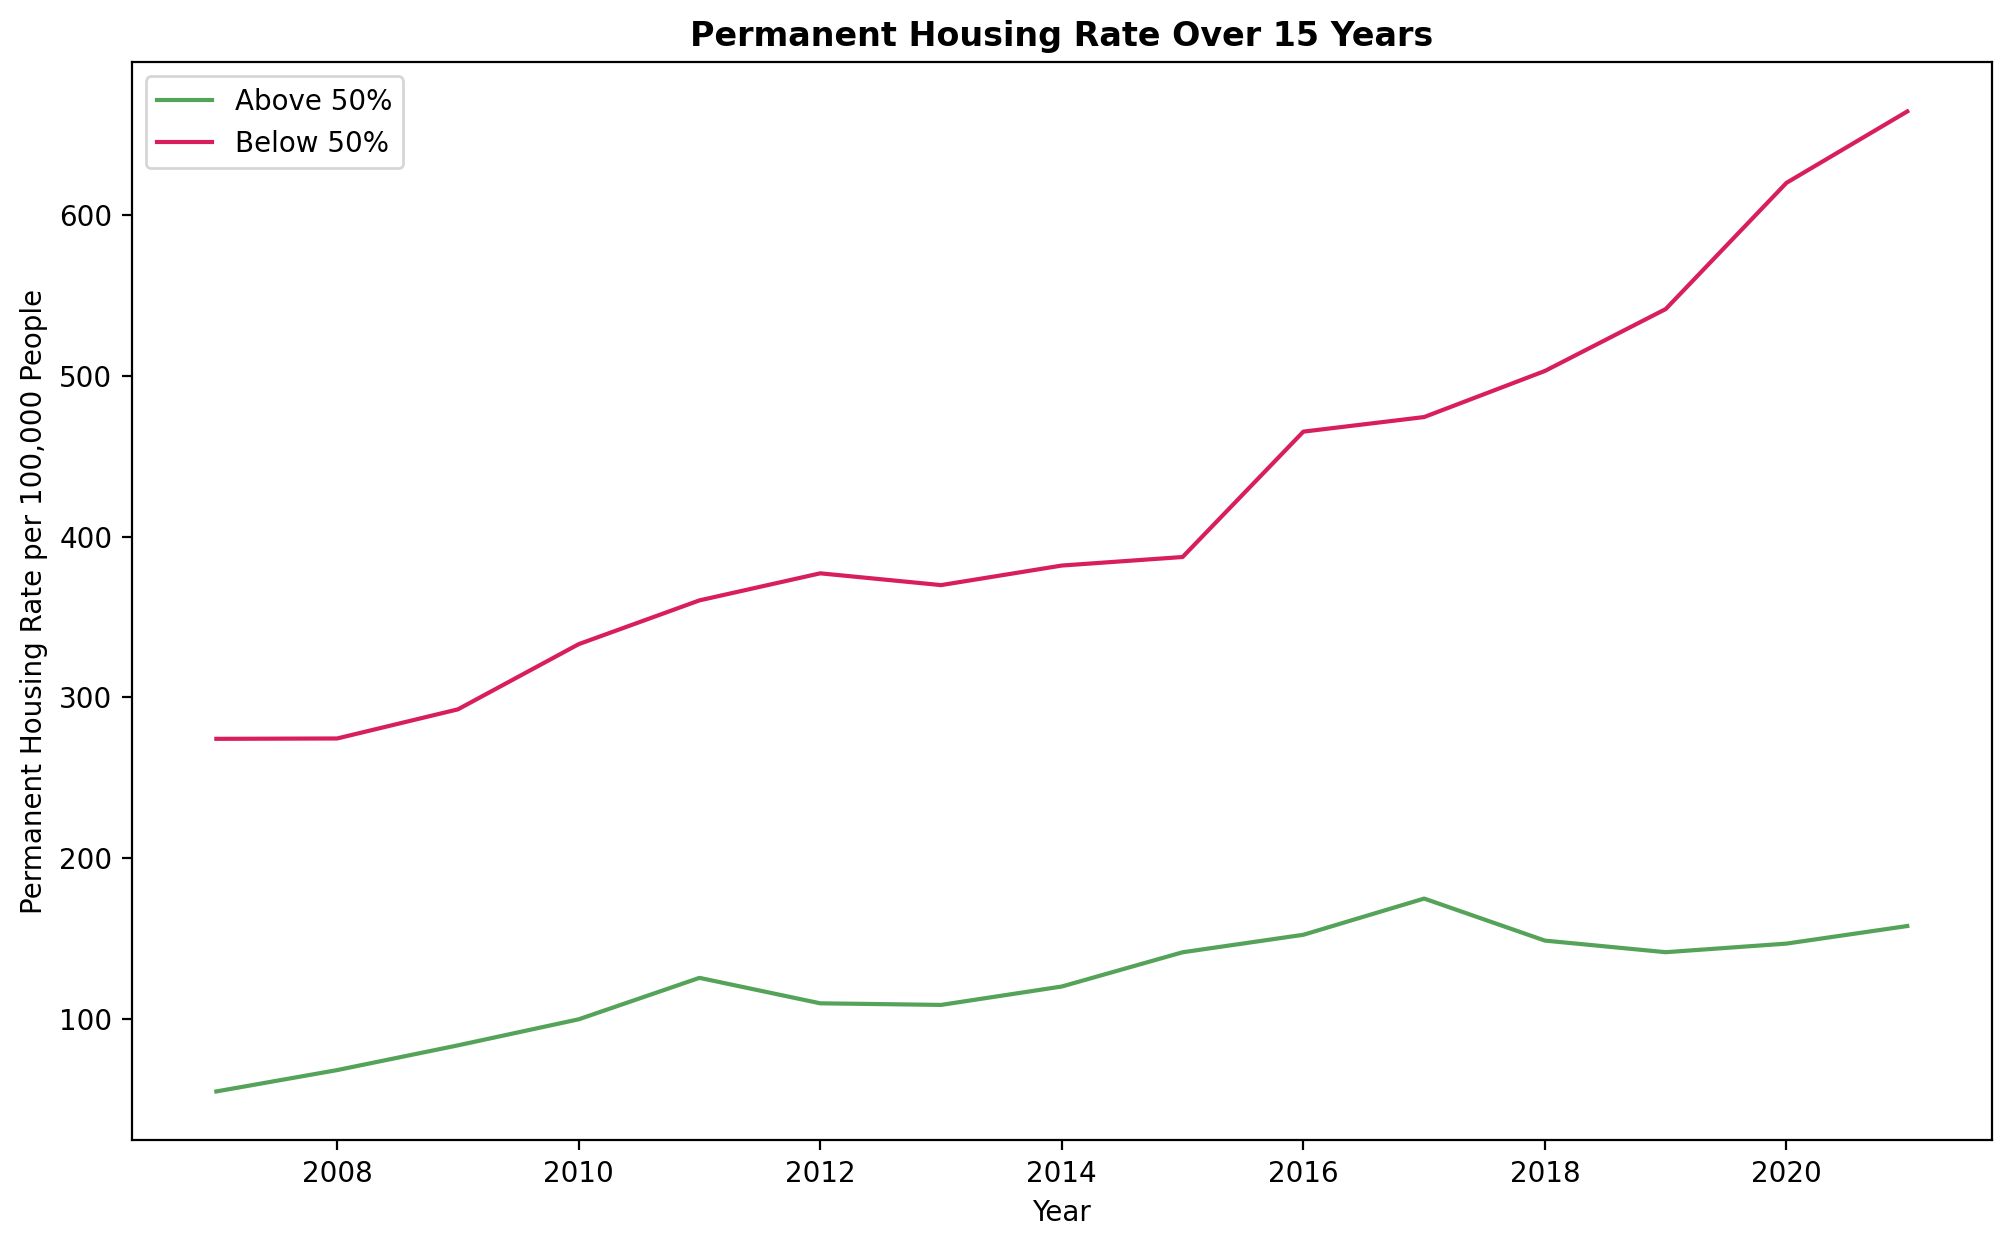

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(subset_above_50["Year"].unique(),
         subset_above_50.groupby("Year")['permanent_housing'].mean(),
         color="#55A259", label="Above 50%")
plt.plot(subset_below_50["Year"].unique(),
         subset_below_50.groupby("Year")['permanent_housing'].mean(),
         color="#D81E5B", label="Below 50%")
plt.legend()
plt.ylabel("Permanent Housing Rate per 100,000 People")
plt.xlabel("Year")
plt.title("Permanent Housing Rate Over 15 Years", fontweight = 'bold')
# Export to results
plt.savefig("../30_results/5_Permanent_Housing_Rate_Over_15_Years.jpg", dpi=1200, bbox_inches = 'tight')
plt.show()

### 4. Trends in Associated Underlying Factors

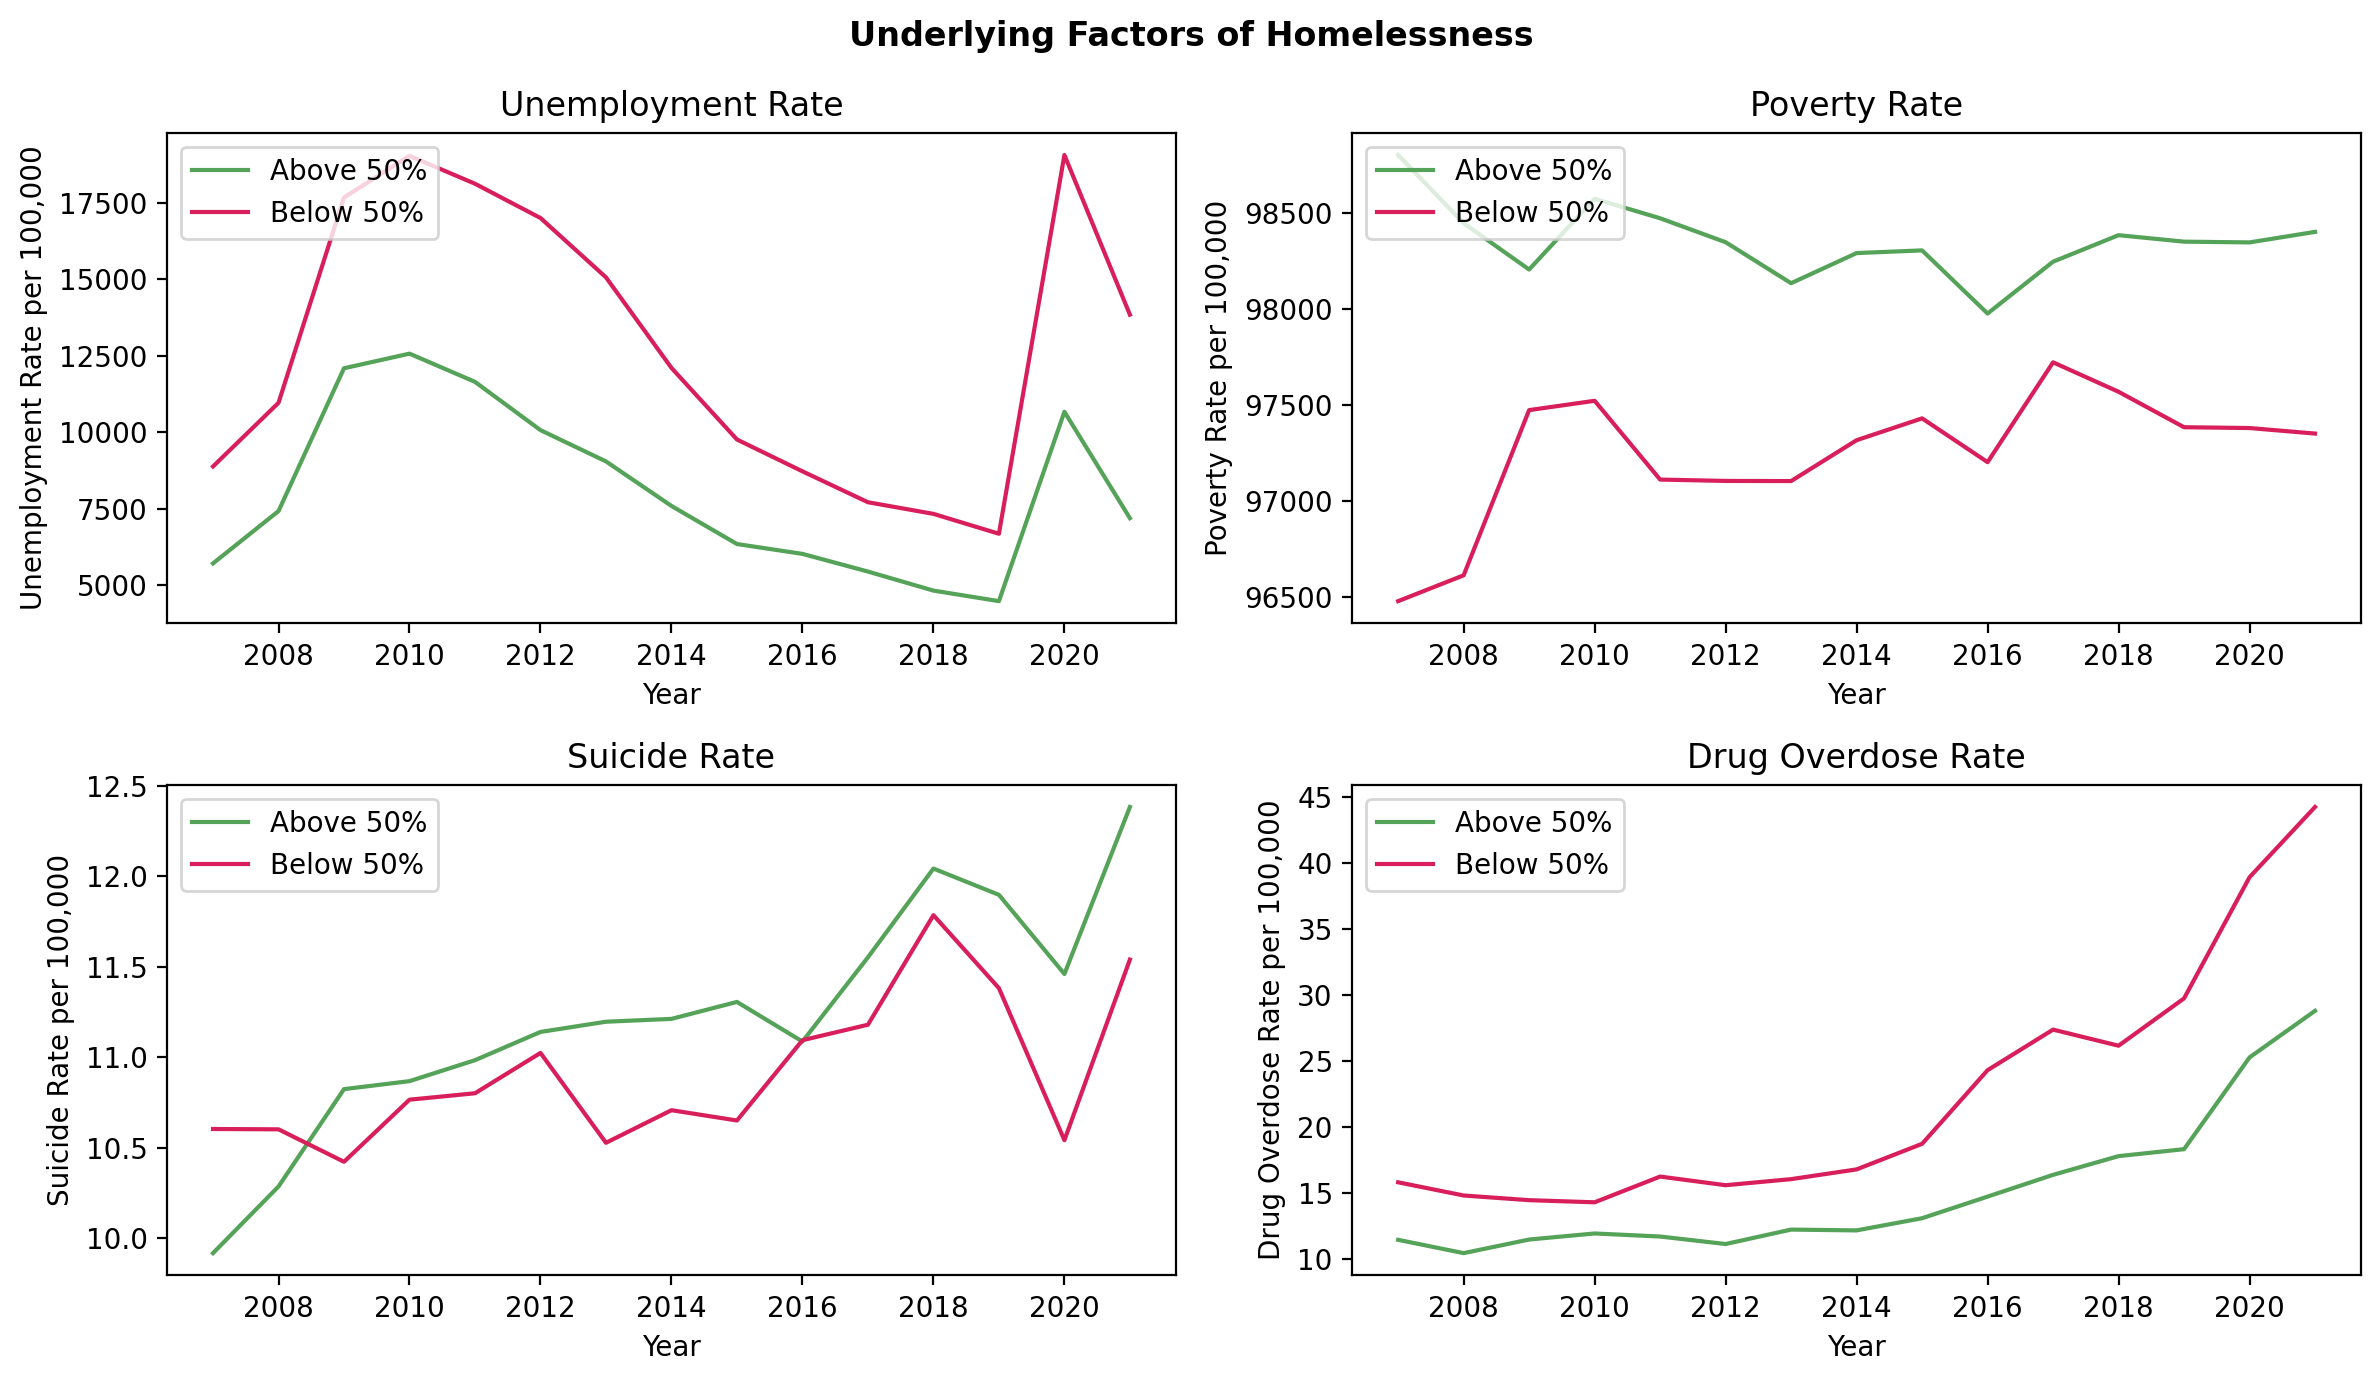

In [6]:
def generate_axes(factor):
    if factor =="unemployment_rate":
        return "Unemployment Rate"
    elif factor == "poverty":
        return "Poverty Rate"
    elif factor == "Suicide Deaths":
        return "Suicide Rate"
    else:
        return "Drug Overdose Rate"
    
years = [i for i in range(2007, 2022)]

factors = ["unemployment_rate", "poverty", "Suicide Deaths", "Drug Deaths"]
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# group_by
for i, factor in enumerate(factors):
    tmp_grp_by_abv = subset_above_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_grp_by_below = subset_below_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_1 = tmp_grp_by_abv[factor].values.tolist()
    tmp_2 = tmp_grp_by_below[factor].values.tolist()
    factor_label = generate_axes(factor)
    axs[i // 2, i % 2].plot(years, tmp_1, color="#55A259", label="Above 50%")
    axs[i // 2, i % 2].plot(years, tmp_2, color="#D81E5B", label="Below 50%")
    axs[i // 2, i % 2].set_title(factor_label)
    axs[i // 2, i % 2].set_xlabel("Year")
    axs[i // 2, i % 2].set_ylabel(f"{factor_label} per 100,000")
    axs[i // 2, i % 2].legend(loc='upper left')

fig.suptitle("Underlying Factors of Homelessness", fontweight='bold')
# Export to results
plt.savefig("../30_results/6_Underlying_Factors_of_Homelessness.jpg", dpi=1200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

### 5. Demographics Across Cities who Substantially Reduced Homelessness

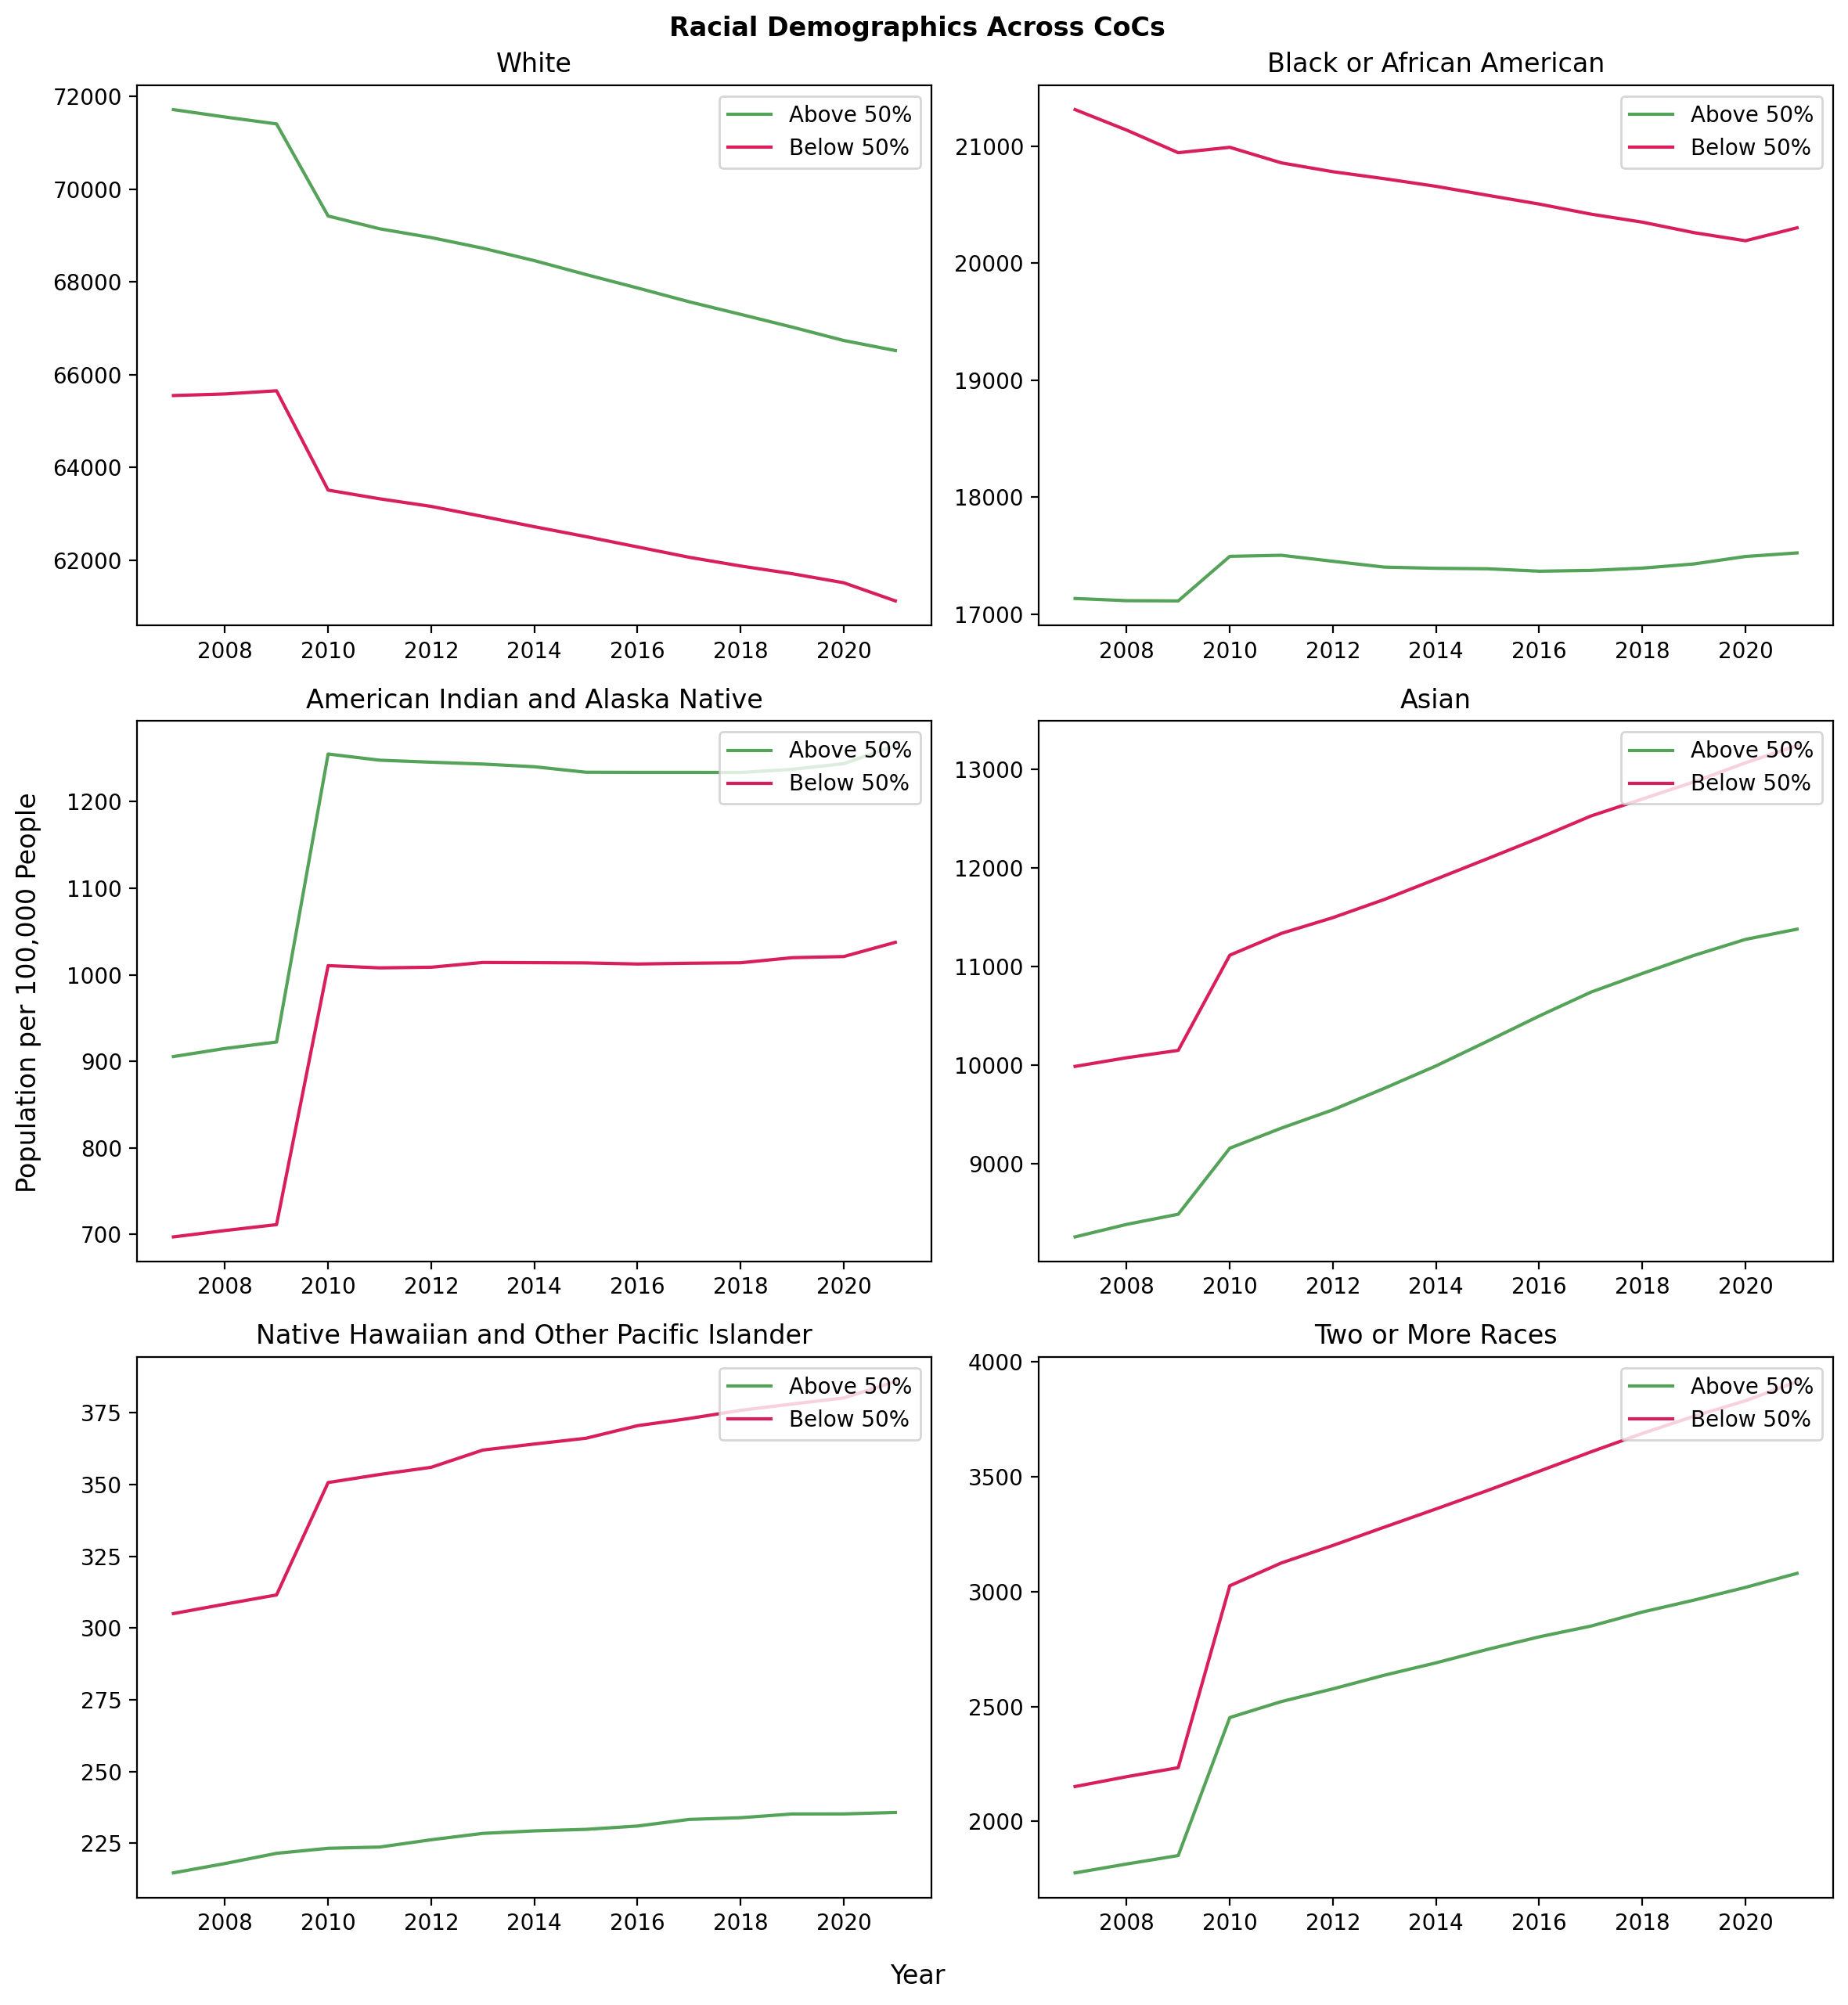

In [16]:
years = [i for i in range(2007, 2022)]

races = ['White', 'Black or African American', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Two or More Races']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))

# group_by
for i, factor in enumerate(races):
    tmp_grp_by_abv = subset_above_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_grp_by_below = subset_below_50.groupby(["Year"])[factor].mean().reset_index()
    tmp_1 = tmp_grp_by_abv[factor].values.tolist()
    tmp_2 = tmp_grp_by_below[factor].values.tolist()
    # races = generate_axes(factor)
    plt.subplot(3, 2, i+1)
    plt.plot(years, tmp_1, color="#55A259", label="Above 50%")
    plt.plot(years, tmp_2, color="#D81E5B", label="Below 50%")
    plt.title(races[i])
    plt.legend(loc='upper right')

fig.suptitle("Racial Demographics Across CoCs", fontweight='bold')
fig.supxlabel("Year")
fig.supylabel("Population per 100,000 People")
plt.savefig("../30_results/7_Racial_Demographics_Across_CoCs.jpg", dpi=1200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()